In [144]:
## Import all libries required to wrangle the raw data for the first part of the project.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
from pandas import DataFrame
import numpy as np

In [75]:
## The raw data file is an Excel file. The file needs to be read in the notebook using pandas. 
## Also open the head to make sure it transfer correctly as data frame. 
raw_data = 'Raw Data.Fundaments of Data Analytics.xlsx'
df = pd.read_excel(raw_data)
df.head(10)

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time,OFFICERS_AT_SCENE
0,1702311,16000104983,2016104983,242,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,2016-03-26 17:17:00,46XX BLOCK OF 38 AV S,R,R3,10100.2019,-122.284904,47.561256,"(47.561256, -122.284904)",FIGHT - IP - PHYSICAL (NO WEAPONS),DISTURBANCES,DISTURBANCES,NaT,2
1,1702312,16000104976,2016104976,470,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,2016-03-26 17:15:00,29 AV / E ALDER ST,G,G2,8800.3002,-122.294930,47.604195,"(47.604195, -122.29493)",PARKING VIOLATION (EXCEPT ABANDONED CAR),TRAFFIC RELATED CALLS,PARKING VIOLATIONS,NaT,2
2,1702316,16000104995,2016104995,460,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-03-26 17:19:00,WEST SEATTLE BR WB / 1 AV S ON RP,O,O1,9300.3060,-122.335240,47.571580,"(47.57158, -122.33524)",TRAFFIC - MOVING VIOLATION,TRAFFIC RELATED CALLS,PARKING VIOLATIONS,NaT,0
3,1702317,16000104994,2016104994,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:26:00,24XX BLOCK OF 35 AV W,Q,Q1,5600.4030,-122.402370,47.640358,"(47.640358, -122.40237)","SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,NaT,2
4,1702318,16000104993,2016104993,281,SUSPICIOUS VEHICLE,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:19:00,24 AV / E ALDER ST,G,G2,8800.3008,-122.301090,47.604320,"(47.60432, -122.30109)","SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,NaT,1
5,1702319,16000104992,2016104992,176,LIQUOR VIOLATION - ADULT,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,2016-03-26 17:17:00,92XX BLOCK OF RAINIER AV S,S,S3,11800.6020,-122.268030,47.519850,"(47.51985, -122.26803)",LIQUOR VIOLATIONS - ADULT,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,NaT,2
6,1702321,16000104986,2016104986,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:18:00,27XX BLOCK OF RAINIER AV S,R,R2,10001.1002,-122.299160,47.579674,"(47.579674, -122.29916)",TRESPASS,TRESPASS,TRESPASS,NaT,3
7,1702322,16000104962,2016104962,201,ALACAD - RESIDENTIAL BURGLARY (FALSE),BURGLARY ALACAD (FALSE),FALSE ALACAD,2016-03-26 17:17:00,66XX BLOCK OF S BANGOR ST,S,S3,11900.2016,-122.250630,47.506386,"(47.506386, -122.25063)","ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",ALACAD,SUSPICIOUS CIRCUMSTANCES,NaT,1
8,1702323,16000104918,2016104918,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:18:00,4 AV S / S LANDER ST,O,O1,9300.3019,-122.329056,47.579807,"(47.579807, -122.329056)","HARAS - NO BIAS, THREATS OR MALICIOUSNESS","THREATS, HARASSMENT","THREATS, HARASSMENT",2016-03-26 15:56:00,3
9,1702324,16000104794,2016104794,65,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,2016-03-26 17:14:00,9XX BLOCK OF 14 AV E,C,C1,6500.3017,-122.314590,47.627274,"(47.627274, -122.31459)",THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),OTHER PROPERTY,THEFT,NaT,1


In [76]:
## I want to know the file information such as how many missing entries, types of data, labels and total Index.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 20 columns):
CAD CDW ID                     1046 non-null int64
CAD Event Number               1046 non-null int64
General Offense Number         1046 non-null int64
Event Clearance Code           1046 non-null int64
Event Clearance Description    1046 non-null object
Event Clearance SubGroup       1046 non-null object
Event Clearance Group          1046 non-null object
Event Clearance Date           1046 non-null datetime64[ns]
Hundred Block Location         1046 non-null object
District/Sector                1045 non-null object
Zone/Beat                      1046 non-null object
Census Tract                   1045 non-null float64
Longitude                      1046 non-null float64
Latitude                       1046 non-null float64
Incident Location              1046 non-null object
Initial Type Description       1046 non-null object
Initial Type Subgroup          1046 non-null object
In

In [77]:
## after knowing the information, I would like to confirm the shape of the data frame. 
df.shape

(1046, 20)

In [87]:
## I prefer to make a copy of the original file before it gets clean. 
##I am also checking if the new df_copy is the same as the original df.
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 20 columns):
CAD CDW ID                     1046 non-null int64
CAD Event Number               1046 non-null int64
General Offense Number         1046 non-null int64
Event Clearance Code           1046 non-null int64
Event Clearance Description    1046 non-null object
Event Clearance SubGroup       1046 non-null object
Event Clearance Group          1046 non-null object
Event Clearance Date           1046 non-null datetime64[ns]
Hundred Block Location         1046 non-null object
District/Sector                1045 non-null object
Zone/Beat                      1046 non-null object
Census Tract                   1045 non-null float64
Longitude                      1046 non-null float64
Latitude                       1046 non-null float64
Incident Location              1046 non-null object
Initial Type Description       1046 non-null object
Initial Type Subgroup          1046 non-null object
In

In [88]:
## I wanted to get the sum of all missing number per column.
df_clean.isnull().sum()

CAD CDW ID                       0
CAD Event Number                 0
General Offense Number           0
Event Clearance Code             0
Event Clearance Description      0
Event Clearance SubGroup         0
Event Clearance Group            0
Event Clearance Date             0
Hundred Block Location           0
District/Sector                  1
Zone/Beat                        0
Census Tract                     1
Longitude                        0
Latitude                         0
Incident Location                0
Initial Type Description         0
Initial Type Subgroup            0
Initial Type Group               0
At Scene Time                  646
OFFICERS_AT_SCENE                0
dtype: int64

In [89]:
## I want to located the missing value of District/Sector column. 
df_clean[df_clean['District/Sector'].isnull()]

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time,OFFICERS_AT_SCENE
224,1702543,16000105361,2016105361,460,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-03-26 23:39:00,S KENYON ST / KENYON ON RP,NaN,FS,NaN,-122.334335,47.53204,"(47.53204, -122.334335)",TRAFFIC STOP - OFFICER INITIATED ONVIEW,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,NaT,1


In [90]:
## I want to located the missing value of Census Tract column. 
df_clean[df_clean['Census Tract'].isnull()]

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time,OFFICERS_AT_SCENE
224,1702543,16000105361,2016105361,460,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-03-26 23:39:00,S KENYON ST / KENYON ON RP,NaN,FS,NaN,-122.334335,47.53204,"(47.53204, -122.334335)",TRAFFIC STOP - OFFICER INITIATED ONVIEW,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,NaT,1


In [91]:
## I want to located the missing values of At Scene Time column. We can notice at this point that the row 224 is missing
# the 3 entries. 
df_clean[df_clean['At Scene Time'].isnull()]

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time,OFFICERS_AT_SCENE
0,1702311,16000104983,2016104983,242,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,2016-03-26 17:17:00,46XX BLOCK OF 38 AV S,R,R3,10100.2019,-122.284904,47.561256,"(47.561256, -122.284904)",FIGHT - IP - PHYSICAL (NO WEAPONS),DISTURBANCES,DISTURBANCES,NaT,2
1,1702312,16000104976,2016104976,470,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,2016-03-26 17:15:00,29 AV / E ALDER ST,G,G2,8800.3002,-122.294930,47.604195,"(47.604195, -122.29493)",PARKING VIOLATION (EXCEPT ABANDONED CAR),TRAFFIC RELATED CALLS,PARKING VIOLATIONS,NaT,2
2,1702316,16000104995,2016104995,460,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2016-03-26 17:19:00,WEST SEATTLE BR WB / 1 AV S ON RP,O,O1,9300.3060,-122.335240,47.571580,"(47.57158, -122.33524)",TRAFFIC - MOVING VIOLATION,TRAFFIC RELATED CALLS,PARKING VIOLATIONS,NaT,0
3,1702317,16000104994,2016104994,280,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:26:00,24XX BLOCK OF 35 AV W,Q,Q1,5600.4030,-122.402370,47.640358,"(47.640358, -122.40237)","SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,NaT,2
4,1702318,16000104993,2016104993,281,SUSPICIOUS VEHICLE,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2016-03-26 17:19:00,24 AV / E ALDER ST,G,G2,8800.3008,-122.301090,47.604320,"(47.60432, -122.30109)","SUSPICIOUS PERSON, VEHICLE OR INCIDENT",SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,NaT,1
5,1702319,16000104992,2016104992,176,LIQUOR VIOLATION - ADULT,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,2016-03-26 17:17:00,92XX BLOCK OF RAINIER AV S,S,S3,11800.6020,-122.268030,47.519850,"(47.51985, -122.26803)",LIQUOR VIOLATIONS - ADULT,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,NaT,2
6,1702321,16000104986,2016104986,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:18:00,27XX BLOCK OF RAINIER AV S,R,R2,10001.1002,-122.299160,47.579674,"(47.579674, -122.29916)",TRESPASS,TRESPASS,TRESPASS,NaT,3
7,1702322,16000104962,2016104962,201,ALACAD - RESIDENTIAL BURGLARY (FALSE),BURGLARY ALACAD (FALSE),FALSE ALACAD,2016-03-26 17:17:00,66XX BLOCK OF S BANGOR ST,S,S3,11900.2016,-122.250630,47.506386,"(47.506386, -122.25063)","ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",ALACAD,SUSPICIOUS CIRCUMSTANCES,NaT,1
9,1702324,16000104794,2016104794,65,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,2016-03-26 17:14:00,9XX BLOCK OF 14 AV E,C,C1,6500.3017,-122.314590,47.627274,"(47.627274, -122.31459)",THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),OTHER PROPERTY,THEFT,NaT,1
10,1702325,16000105010,2016105010,245,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,2016-03-26 17:36:00,3XX BLOCK OF 2 AV S,K,K3,9200.2028,-122.330810,47.600464,"(47.600464, -122.33081)","DISTURBANCE, MISCELLANEOUS/OTHER",DISTURBANCES,DISTURBANCES,NaT,3


There are 646 missing entries out of 1046 total entries on 'At Scene Time' column. This means that about 61 % of the entries
in this column are missing. The 'At scene time' column is important since this data is from a 911 call events. 
I would be important to know the time information since some calls could be from a life treated issues and the time of 
arrive could be meaning the life of a person or people. However, since we do not have this entry inforamtion and 
it is more than half of the entries missing, I would remove the whole column.
Another instance is the '224' row. This row is missing 3 entries. Since we have coordenates to find a location, we could compare the coordenates to other entries, however we would have to see almos all of the 1045 coordenates to match the right entry and that would take a lot of time. In this case, I will drop the whole row. 

In [92]:
# First I wanted to drop the column that is missing 61% of entries. the axis is = 1 because I need to drop a column if it was
# 0, that would be for a row. The inplace = True is place to execute the change on df_clean, if it was empty or False, there
# would be no change in df_clean data frame. 
df_clean.drop(axis = 1, columns=['At Scene Time'], inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 19 columns):
CAD CDW ID                     1046 non-null int64
CAD Event Number               1046 non-null int64
General Offense Number         1046 non-null int64
Event Clearance Code           1046 non-null int64
Event Clearance Description    1046 non-null object
Event Clearance SubGroup       1046 non-null object
Event Clearance Group          1046 non-null object
Event Clearance Date           1046 non-null datetime64[ns]
Hundred Block Location         1046 non-null object
District/Sector                1045 non-null object
Zone/Beat                      1046 non-null object
Census Tract                   1045 non-null float64
Longitude                      1046 non-null float64
Latitude                       1046 non-null float64
Incident Location              1046 non-null object
Initial Type Description       1046 non-null object
Initial Type Subgroup          1046 non-null object
In

In [93]:
# we can se that the shape of the data frame change from 20 to 19 on the column size. 
df_clean.shape

(1046, 19)

In [95]:
# Now we remove the 224 row which has missing information and the final result is our clean data frame.
df_clean.drop([224],axis = 0, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1045
Data columns (total 19 columns):
CAD CDW ID                     1045 non-null int64
CAD Event Number               1045 non-null int64
General Offense Number         1045 non-null int64
Event Clearance Code           1045 non-null int64
Event Clearance Description    1045 non-null object
Event Clearance SubGroup       1045 non-null object
Event Clearance Group          1045 non-null object
Event Clearance Date           1045 non-null datetime64[ns]
Hundred Block Location         1045 non-null object
District/Sector                1045 non-null object
Zone/Beat                      1045 non-null object
Census Tract                   1045 non-null float64
Longitude                      1045 non-null float64
Latitude                       1045 non-null float64
Incident Location              1045 non-null object
Initial Type Description       1045 non-null object
Initial Type Subgroup          1045 non-null object
In

In [101]:
# We are looking for a whole row entry duplicated in the df_clean data frame. In this case we get 0 duplicates.
df_clean.duplicated().sum()

0

In [152]:
# dates and times are together, we can see that on the same date, there were several events. 
#I am only interested on the clearance date, I am going to separate the date with the time. 
df_dates = df_clean["Event Clearance Date"].reset_index()
df_dates.head()

,index,Event Clearance Date
0,0,2016-03-26 17:17:00
1,1,2016-03-26 17:15:00
2,2,2016-03-26 17:19:00
3,3,2016-03-26 17:26:00
4,4,2016-03-26 17:19:00


In [153]:
#Now that dates and time are sepated, I need to value count the dates new column.
df_dates['Dates'] = pd.to_datetime(df['Event Clearance Date']).dt.date
df_dates['Time'] = pd.to_datetime(df['Event Clearance Date']).dt.time
df_dates.head()

,index,Event Clearance Date,Dates,Time
0,0,2016-03-26 17:17:00,2016-03-26,17:17:00
1,1,2016-03-26 17:15:00,2016-03-26,17:15:00
2,2,2016-03-26 17:19:00,2016-03-26,17:19:00
3,3,2016-03-26 17:26:00,2016-03-26,17:26:00
4,4,2016-03-26 17:19:00,2016-03-26,17:19:00


In [155]:
# In this result we know that there are only three clearance dates in the column. Now we want to plot this 3 values. 
df_dates['Dates'].value_counts()

2016-03-27    583
2016-03-26    244
2016-03-28    218
Name: Dates, dtype: int64

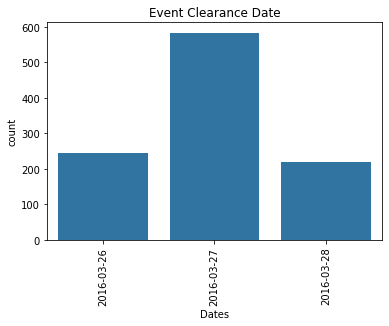

In [157]:
# We can see from this graph that on the date of 2016-03-27 there were almost 600 events resolved. 
# From our raw data we can see that on 2016-03-28 there were only a little over 200 events resolved. 
color_base = sb.color_palette()[0]
sb.countplot(data=df_dates, x='Dates', color = color_base, order = ['2016-03-26','2016-03-27','2016-03-28']);
plt.xticks(rotation=90);
plt.title('Event Clearance Date');

In [141]:
# Here it counts the type of disturbance in the event. Here Narcotics Activity Report was only one event in the given data. 
df_clean['Event Clearance Description'].value_counts()

DISTURBANCE, OTHER                                         123
SUSPICIOUS PERSON                                          105
PARKING VIOLATION (EXCEPT ABANDONED VEHICLES)               67
TRAFFIC (MOVING) VIOLATION                                  65
MOTOR VEHICLE COLLISION                                     62
                                                          ... 
JUVENILE DISTURBANCE                                         1
PARKS EXCLUSION                                              1
PERSON WITH A WEAPON (NOT GUN)                               1
RECKLESS ENDANGERMENT, LITTERING, PARKS CODE VIOLATIONS      1
NARCOTICS ACTIVITY REPORT                                    1
Name: Event Clearance Description, Length: 65, dtype: int64

In [169]:
df_events = df_clean["Event Clearance Description"].reset_index()
df_events.head()

,index,Event Clearance Description
0,0,FIGHT DISTURBANCE
1,1,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES)
2,2,TRAFFIC (MOVING) VIOLATION
3,3,SUSPICIOUS PERSON
4,4,SUSPICIOUS VEHICLE


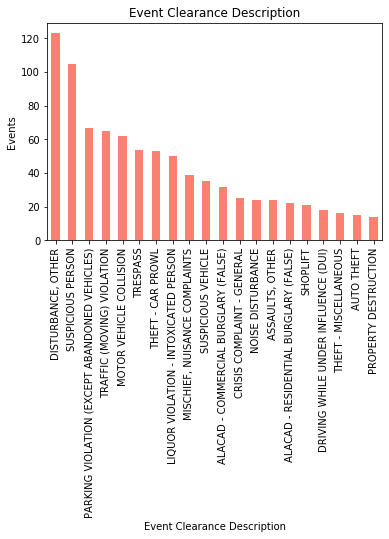

In [189]:
# In this graph we can see how 'Disturbance, Other' is the most common event with more than 100 cases.
# We are seeing only the 20 most relevant events in the given data. 
df_events = df_events['Event Clearance Description'].value_counts()
ax = df_events[:20].plot.bar(x = 'Event Clearance Description', y = 'index', rot=90, 
                             title = 'Event Clearance Description', color = 'salmon', legend = None);
ax.set_ylabel("Events");
ax.set_xlabel("Event Clearance Description");

In [181]:
## In here, the Districts are organized by the higher to lower amount of events. 
df_clean['District/Sector'].value_counts()

H    125
M     91
E     86
B     83
K     64
Q     62
R     60
D     60
N     53
U     52
S     44
C     44
J     41
G     39
L     38
W     37
F     35
O     31
Name: District/Sector, dtype: int64

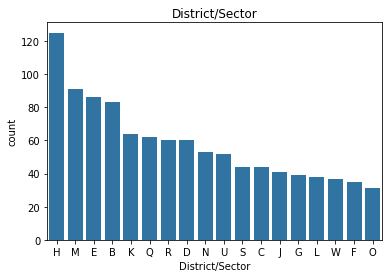

In [186]:
# In this graph we can see how the H District has the most event numbers and the O district has the less. 
df_sectors = df_clean["District/Sector"].reset_index()
color_base = sb.color_palette()[0]
sb.countplot(data=df_sectors, x='District/Sector', color = color_base, order = ['H','M','E','B','K','Q','R','D','N',
                                                                                'U','S','C','J','G','L','W','F','O']);
plt.xticks(rotation=0);
plt.title('District/Sector');

In [187]:
df_clean.to_excel('clean_data.xlsx')

In [188]:
df_dates.to_excel('dates.xlsx')
df_events.to_excel('events.xlsx')
df_sectors.to_excel('sectors.xlsx')